In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


#Data preparation



In [2]:
BASE_PATH = os.getcwd()+'/drive/MyDrive/Churn'
DATA_PATH = os.path.join(BASE_PATH, "data")

In [3]:
csv_file = os.path.join(DATA_PATH, 'Telco_customer_churn.xlsx')
train_df = pd.read_excel(csv_file)
train_df.head()

FileNotFoundError: ignored

#Data preprocessing

In [ ]:
train_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
train_df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


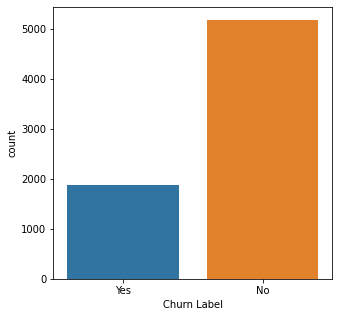

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=train_df['Churn Label'], linewidth=1)
plt.show()

In [ ]:
col_list = ['CustomerID', 'Count', 'Country', 'State', 'City',
       'Lat Long', 'Churn Label', 'Churn Score',
       'CLTV', 'Churn Reason']

In [ ]:
customer_ids = train_df["CustomerID"].values
cities = train_df["City"].values
train_df.drop(col_list, axis=1, inplace = True)
train_df["Total Charges"] = pd.to_numeric(train_df["Total Charges"], errors="coerce")

In [ ]:
num_cols = train_df.select_dtypes(exclude="object")
cat_cols = train_df.select_dtypes(include="object")

In [ ]:
for i in num_cols.columns:
  print(i, " ", len(np.unique(num_cols[i].values)))

Zip Code   1652
Latitude   1652
Longitude   1651
Tenure Months   73
Monthly Charges   1585
Total Charges   6541
Churn Value   2


In [ ]:
for i in cat_cols.columns:
  print(i, " ", len(np.unique(cat_cols[i].values)))

Gender   2
Senior Citizen   2
Partner   2
Dependents   2
Phone Service   2
Multiple Lines   3
Internet Service   3
Online Security   3
Online Backup   3
Device Protection   3
Tech Support   3
Streaming TV   3
Streaming Movies   3
Contract   3
Paperless Billing   2
Payment Method   4


Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')


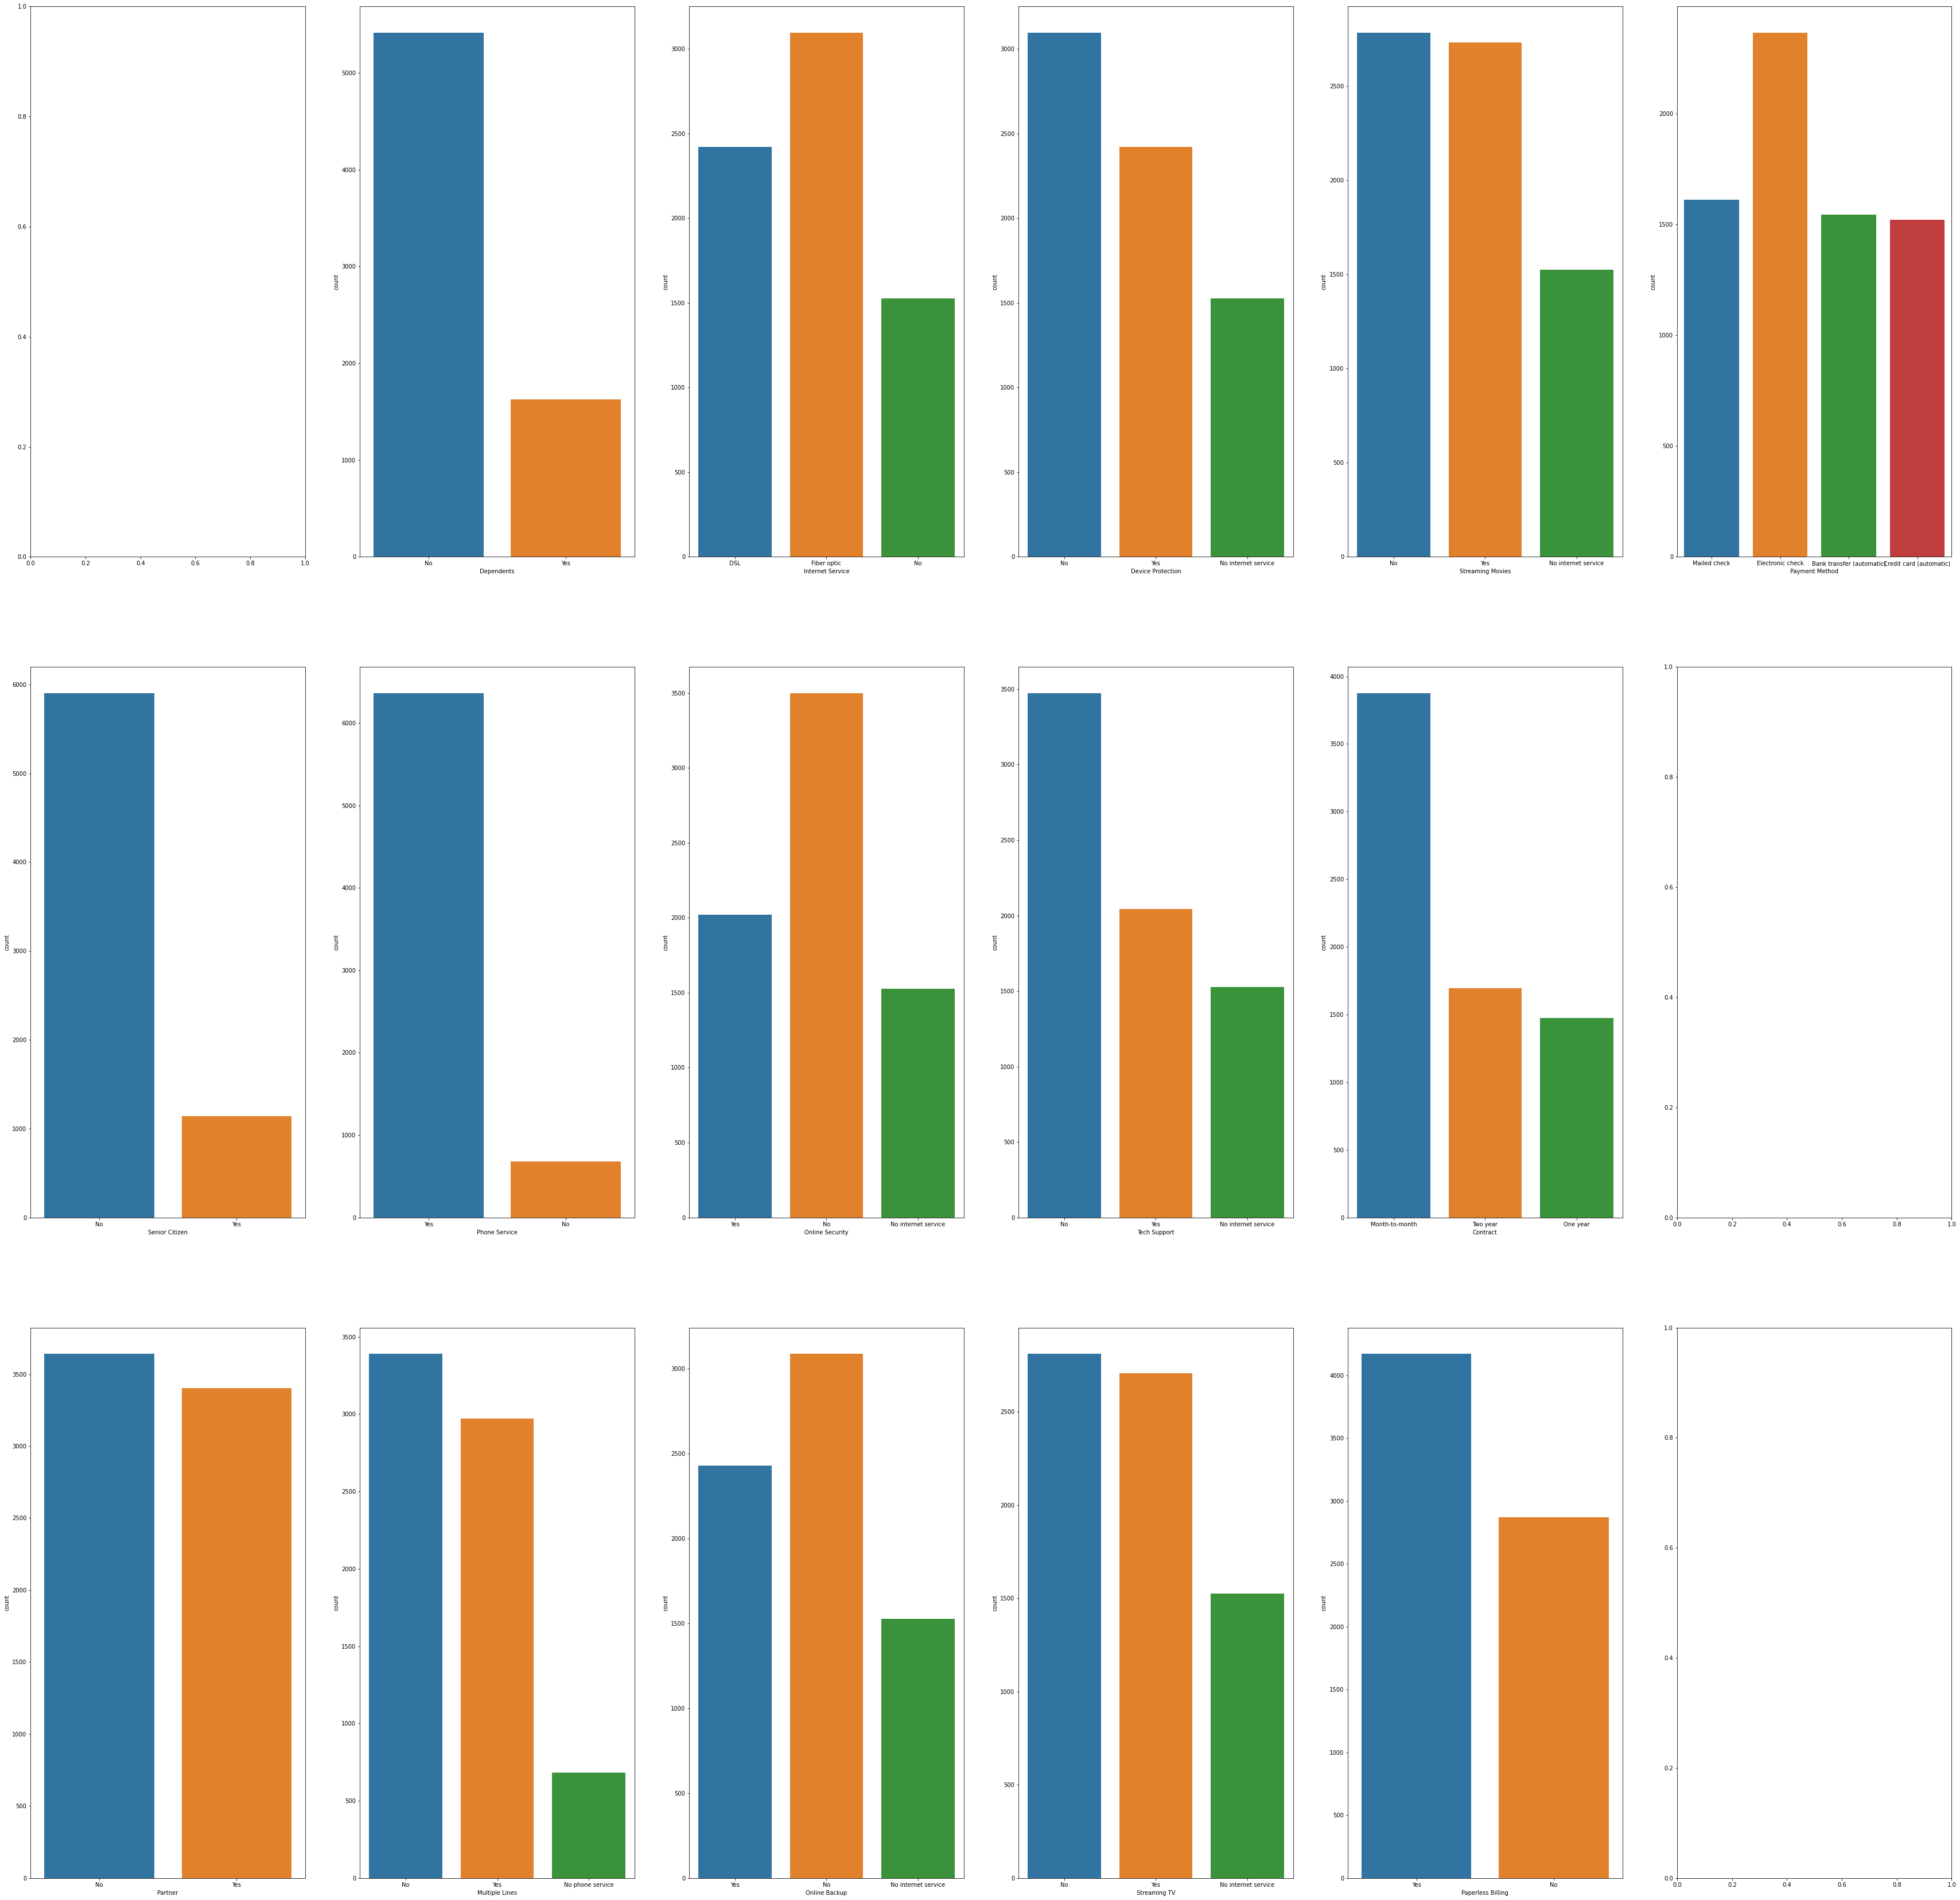

In [ ]:
fig, ax=plt.subplots(3,6, figsize=(60, 60))
index=1
print(cat_cols.columns[1:])
for k in cat_cols.columns[1:]:
  i,j=index%3, index//3
  sns.countplot(x=cat_cols[k], ax=ax[i, j])
  index += 1
  ax[i, j].tick_params(axis='x', labelrotation=0)
plt.show()

The below correlation plot shows that there is strong correlation between `Tenure Months` and `Total Charges`, `Churn Value`, `Zipcode`, `Latitude` and `Longitude`.

---



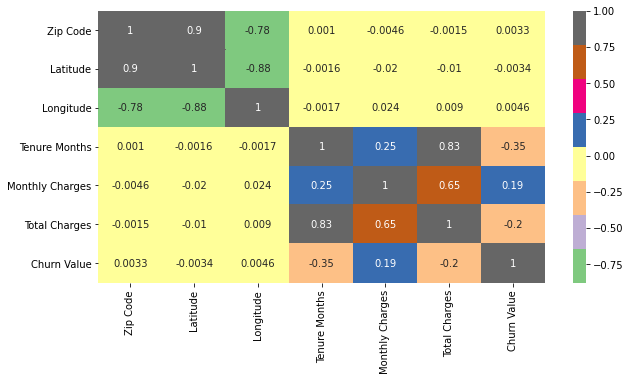

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.corr(), annot=True, cmap='Accent')

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler

features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
df_features = pd.DataFrame(train_df, columns=features)
df_remaining_features = train_df.drop(columns=features)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features)

train_df = pd.DataFrame(rescaled_features, columns=features, index=df_remaining_features.index)
train_df.head()

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)''

SyntaxError: ignored

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
train_df.head()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Zip Code                                7043 non-null   int64  
 1   Latitude                                7043 non-null   float64
 2   Longitude                               7043 non-null   float64
 3   Tenure Months                           7043 non-null   int64  
 4   Monthly Charges                         7043 non-null   float64
 5   Total Charges                           7032 non-null   float64
 6   Churn Value                             7043 non-null   int64  
 7   Gender_Male                             7043 non-null   uint8  
 8   Senior Citizen_Yes                      7043 non-null   uint8  
 9   Partner_Yes                             7043 non-null   uint8  
 10  Dependents_Yes                          7043 non-null   uint

In [ ]:
train_df = train_df.dropna()
print(train_df.isnull().sum())

Zip Code                                  0
Latitude                                  0
Longitude                                 0
Tenure Months                             0
Monthly Charges                           0
Total Charges                             0
Churn Value                               0
Gender_Male                               0
Senior Citizen_Yes                        0
Partner_Yes                               0
Dependents_Yes                            0
Phone Service_Yes                         0
Multiple Lines_No phone service           0
Multiple Lines_Yes                        0
Internet Service_Fiber optic              0
Internet Service_No                       0
Online Security_No internet service       0
Online Security_Yes                       0
Online Backup_No internet service         0
Online Backup_Yes                         0
Device Protection_No internet service     0
Device Protection_Yes                     0
Tech Support_No internet service

In [ ]:
train_df.shape

(7032, 34)

In [ ]:
y = train_df['Churn Value'].tolist()
X = train_df.drop(['Churn Value'], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# train_df.Churn.replace(to_replace = dict(Yes=1, No=0),inplace=True)

In [ ]:
 from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def acc_f1_auc_scores(model,y_test, y_pred, y_pred_probabilities):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    acc_score_result, f1_score_result, auc_score_result = accuracy_score(y_test,y_pred), f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'Model:{model} \nAccuracy score:{acc_score_result} \nF1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

## K nearest neighbour

### KNN score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

acc_f1_auc_scores('KNN',y_test, y_pred_knn, y_pred_knn_prob)

Model:KNN 
Accuracy score:0.7420042643923241 
F1 Score: 0.3899159663865546 
AUC Score (PR): 0.48860749553255783



### GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

acc_f1_auc_scores('KNN_tuned',y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob)

KNN best number of neighbors: {'n_neighbors': 6} 

Model:KNN_tuned 
Accuracy score:0.7469793887704336 
F1 Score: 0.3153846153846154 
AUC Score (PR): 0.4905727063049744



### KNN on smote

In [ ]:
knn_resampled = KNeighborsClassifier()
knn_resampled.fit(X_train_resampled,y_train_resampled)

y_pred_knn_resampled = knn_resampled.predict(X_test_resampled)
y_pred_knn_prob_resampled = knn_resampled.predict_proba(X_test_resampled)
acc_f1_auc_scores('KNN_resampled',y_test_resampled, y_pred_knn_resampled, y_pred_knn_prob_resampled)

Model:KNN_resampled 
Accuracy score:0.7260406582768635 
F1 Score: 0.7443541102077688 
AUC Score (PR): 0.8112846007181289



### KNN on smote and gridsearchcv


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 30)}
knn_tunned_resampled = KNeighborsClassifier()
knn_cv_resampled = GridSearchCV(knn_tunned_resampled, param_grid, cv=5)
knn_cv_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned_resampled = knn_cv_resampled.predict(X_test_resampled)
y_pred_knn_tuned_prob_resampled = knn_cv_resampled.predict_proba(X_test_resampled)

print('KNN best number of neighbors:', knn_cv_resampled.best_params_, '\n')

acc_f1_auc_scores('KNN_tunned_resampled',y_test_resampled, y_pred_knn_tuned_resampled, y_pred_knn_tuned_prob_resampled)

KNN best number of neighbors: {'n_neighbors': 1} 

Model:KNN_tunned_resampled 
Accuracy score:0.7879961277831559 
F1 Score: 0.7970342910101946 
AUC Score (PR): 0.8398237058832273



## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)
acc_f1_auc_scores('logreg',y_test, y_pred_logreg, y_pred_logreg_prob)

Model:logreg 
Accuracy score:0.7938877043354655 
F1 Score: 0.5524691358024691 
AUC Score (PR): 0.6502511274525234



GridSearchCV

In [ ]:
param_grid_L1 = { 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(max_iter=1000)   
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)
acc_f1_auc_scores('logreg',y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob)

Logistic Regression - Best Parameters:  {'C': 1.9000000000000001}
Model:logreg 
Accuracy score:0.7938877043354655 
F1 Score: 0.5524691358024691 
AUC Score (PR): 0.65024755301262



Logreg on smote data


In [ ]:
logreg_resampled = LogisticRegression(max_iter=1000)
logreg_resampled.fit(X_train_resampled,y_train_resampled)

y_pred_logreg_resampled = logreg_resampled.predict(X_test_resampled)
y_pred_logreg_prob_resampled = logreg_resampled.predict_proba(X_test_resampled)
acc_f1_auc_scores('logreg_resampled',y_test_resampled, y_pred_logreg_resampled, y_pred_logreg_prob_resampled)

Model:logreg_resampled 
Accuracy score:0.7279767666989352 
F1 Score: 0.7253176930596286 
AUC Score (PR): 0.7932783445289842



log reg on smote data and gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_L1 = {'C': np.arange(.1, 5, .1)}
logreg_tunned_resampled = LogisticRegression(max_iter=1000) 
logreg_cv_resampled = GridSearchCV(logreg_tunned_resampled, param_grid_L1, cv=5)
logreg_cv_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned_resampled = logreg_cv_resampled.predict(X_test_resampled)
y_pred_logreg_tuned_prob_resampled = logreg_cv_resampled.predict_proba(X_test_resampled)

print('logreg best number of neighbors:', logreg_cv_resampled.best_params_, '\n')

acc_f1_auc_scores('logreg_tunned_resampled',y_test_resampled, y_pred_logreg_tuned_resampled, y_pred_logreg_tuned_prob_resampled)

logreg best number of neighbors: {'C': 0.30000000000000004} 

Model:logreg_tunned_resampled 
Accuracy score:0.7279767666989352 
F1 Score: 0.7253176930596286 
AUC Score (PR): 0.7932783445289842



## Support vector machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',probability=True) 
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
y_pred_svc_prob = svc.predict_proba(X_test)
acc_f1_auc_scores('svc',y_test, y_pred_svc, y_pred_svc_prob)

Model:svc 
Accuracy score:0.7192608386638237 
F1 Score: 0.0 
AUC Score (PR): 0.2720010486142807



GridSearchCV

In [ ]:
param_grid_svm = {'C': [1]}
svc_tunned = SVC(kernel='rbf', probability=True) 
svc_cv = GridSearchCV(svc_tunned, param_grid_svm, cv=5,n_jobs=-1)
svc_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svc_tuned = svc_cv.predict(X_test)
y_pred_svc_tuned_prob = svc_cv.predict_proba(X_test)

print('SVC - Best Parameters: ', svc_cv.best_params_)
acc_f1_auc_scores('svc_cv',y_test, y_pred_svc_tuned, y_pred_svc_tuned_prob)

KeyboardInterrupt: ignored

svc on smote data


In [ ]:
from sklearn.svm import SVC
svc_resampled = SVC(kernel='rbf', probability=True)
svc_resampled.fit(X_train_resampled,y_train_resampled)
y_pred_svc_resampled = svc_resampled.predict(X_test_resampled)
y_pred_svc_prob_resampled = svc_resampled.predict_proba(X_test_resampled)
acc_f1_auc_scores('svc_resampled',y_test_resampled, y_pred_svc_resampled, y_pred_svc_prob_resampled)


Model:svc_resampled 
Accuracy score:0.5871248789932236 
F1 Score: 0.6695079426578845 
AUC Score (PR): 0.6405061873565806



SVC on smote data and gridsearchcv

In [ ]:
param_grid_svm = {'C': [1,10]}
svc_tunned_resampled = SVC(kernel='rbf',probability=True) 
svc_cv_resampled = GridSearchCV(svc_tunned_resampled, param_grid_svm, cv=3,n_jobs=-1)
svc_cv_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svc_tuned_resampled = svc_cv_resampled.predict(X_test_resampled)
y_pred_svc_tuned_prob_resampled = svc_cv_resampled.predict_proba(X_test_resampled)

print('SVC_resampled - Best Parameters: ', svc_cv_resampled.best_params_)
acc_f1_auc_scores('svc_cv_resampled',y_test_resampled, y_pred_svc_tuned_resampled, y_pred_svc_tuned_prob_resampled)

SVC_resampled - Best Parameters:  {'C': 10}
Model:svc_cv_resampled 
Accuracy score:0.5876089060987415 
F1 Score: 0.6610978520286396 
AUC Score (PR): 0.6473084370820648



## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)

acc_f1_auc_scores('decision tree',y_test, y_pred_dt, y_pred_dt_prob)

Model:decision tree 
Accuracy score:0.7562189054726368 
F1 Score: 0.5585585585585586 
AUC Score (PR): 0.6219701107237545



In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dt_cv = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, verbose=0)
dt_cv.fit(X_train, y_train)


# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_dt_tuned = dt_cv.predict(X_test)
y_pred_dt_tuned_prob = dt_cv.predict_proba(X_test)

print('Decision tree - Best Parameters: ', dt_cv.best_params_)

acc_f1_auc_scores('Decision tree tuned',y_test, y_pred_dt_tuned, y_pred_dt_tuned_prob )

Decision tree - Best Parameters:  {'criterion': 'gini', 'max_depth': 5}
Model:Decision tree tuned 
Accuracy score:0.7945984363894811 
F1 Score: 0.6270967741935483 
AUC Score (PR): 0.6835330647919895



SMote


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_resampled = DecisionTreeClassifier()
dt_resampled.fit(X_train_resampled,y_train_resampled)

y_pred_dt_resampled = dt_resampled.predict(X_test_resampled)
y_pred_dt_prob_resampled = dt_resampled.predict_proba(X_test_resampled)

acc_f1_auc_scores('decision tree_resampled',y_test_resampled, y_pred_dt_resampled, y_pred_dt_prob_resampled)

Model:decision tree_resampled 
Accuracy score:0.813649564375605 
F1 Score: 0.8137397194000968 
AUC Score (PR): 0.8594896135353685



SMOTE + Grdisearchcv

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dt_cv_resampled = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, verbose=0)
dt_cv_resampled.fit(X_train_resampled, y_train_resampled)


# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_dt_tuned_resampled = dt_cv_resampled.predict(X_test_resampled)
y_pred_dt_tuned_prob_resampled = dt_cv_resampled.predict_proba(X_test_resampled)

print('Decision tree_resampled - Best Parameters: ', dt_cv_resampled.best_params_)

acc_f1_auc_scores('Decision tree tuned_resampled',y_test_resampled, y_pred_dt_tuned_resampled, y_pred_dt_tuned_prob_resampled )

Decision tree_resampled - Best Parameters:  {'criterion': 'gini', 'max_depth': 10}
Model:Decision tree tuned_resampled 
Accuracy score:0.8422071636011617 
F1 Score: 0.8408203125000001 
AUC Score (PR): 0.9069451664909888



## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

acc_f1_auc_scores('random forest',y_test, y_pred_rf, y_pred_rf_prob)

Model:random forest 
Accuracy score:0.7960199004975125 
F1 Score: 0.5846599131693198 
AUC Score (PR): 0.6870502439584947



GridSearchCV

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 100, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 100, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

acc_f1_auc_scores('random forest tuned',y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob )

Random Forest - Best Parameters:  {'n_estimators': 40, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Model:random forest tuned 
Accuracy score:0.7974413646055437 
F1 Score: 0.5851528384279476 
AUC Score (PR): 0.6939254434580495



Random forest on smote data


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_resampled = RandomForestClassifier()
rf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_rf_resampled = rf_resampled.predict(X_test_resampled)
y_pred_rf_prob_resampled = rf_resampled.predict_proba(X_test_resampled)

acc_f1_auc_scores('random forest_resampled',y_test_resampled, y_pred_rf_resampled, y_pred_rf_prob_resampled)

Model:random forest_resampled 
Accuracy score:0.8770571151984511 
F1 Score: 0.8728728728728729 
AUC Score (PR): 0.9563381005791181



Random forest on smote data and gridsearchcv

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf_resampled = RandomForestClassifier()
rf_random_grid_resampled = RandomizedSearchCV(estimator=rf_resampled, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned_resampled = rf_random_grid_resampled.predict(X_test_resampled)
y_pred_rf_tuned_prob_resampled = rf_random_grid_resampled.predict_proba(X_test_resampled)

print('Random Forest_resampled - Best Parameters: ', rf_random_grid_resampled.best_params_)

acc_f1_auc_scores('random forest tuned_resampled',y_test_resampled, y_pred_rf_tuned_resampled, y_pred_rf_tuned_prob_resampled )

Random Forest_resampled - Best Parameters:  {'n_estimators': 1230, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'gini', 'bootstrap': True}
Model:random forest tuned_resampled 
Accuracy score:0.8770571151984511 
F1 Score: 0.873253493013972 
AUC Score (PR): 0.9576687217377868



## LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(random_state = 42)
lgbmc.fit(X_train,y_train)

y_pred_lgbmc = lgbmc.predict(X_test)
y_pred_lgbmc_prob = lgbmc.predict_proba(X_test)

acc_f1_auc_scores('LGBM',y_test, y_pred_lgbmc, y_pred_lgbmc_prob)

Model:LGBM 
Accuracy score:0.8045486851457001 
F1 Score: 0.6164574616457462 
AUC Score (PR): 0.7034953420988628



In [ ]:
from lightgbm import LGBMClassifier

lgbmc_resampled = LGBMClassifier(random_state = 42)
lgbmc_resampled.fit(X_train_resampled,y_train_resampled)

y_pred_lgbmc_resampled = lgbmc_resampled.predict(X_test_resampled)
y_pred_lgbmc_prob_resampled = lgbmc_resampled.predict_proba(X_test_resampled)

acc_f1_auc_scores('LGBM_resampled',y_test_resampled, y_pred_lgbmc_resampled, y_pred_lgbmc_prob_resampled)

Model:LGBM_resampled 
Accuracy score:0.8775411423039691 
F1 Score: 0.8724155320221886 
AUC Score (PR): 0.9566993674151051



## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

y_pred_xgbc = xgbc.predict(X_test)
y_pred_xgbc_prob = xgbc.predict_proba(X_test)

acc_f1_auc_scores('XGBoost',y_test, y_pred_xgbc, y_pred_xgbc_prob)

Model:XGBoost 
Accuracy score:0.8159203980099502 
F1 Score: 0.6273381294964029 
AUC Score (PR): 0.7276110274595132



In [ ]:
from xgboost import XGBClassifier
xgbc_resampled = XGBClassifier()
xgbc_resampled.fit(X_train_resampled,y_train_resampled)

y_pred_xgbc_resampled = xgbc_resampled.predict(X_test_resampled)
y_pred_xgbc_prob_resampled = xgbc_resampled.predict_proba(X_test_resampled)

acc_f1_auc_scores('XGBoost_resampled',y_test_resampled, y_pred_xgbc_resampled, y_pred_xgbc_prob_resampled)

Model:XGBoost_resampled 
Accuracy score:0.8780251694094869 
F1 Score: 0.875 
AUC Score (PR): 0.9580999603408737



ROC Curve

In [ ]:
y_pred_prob_knn = y_pred_knn_tuned_prob_resampled[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_resampled, y_pred_prob_knn)

y_pred_prob_svc = y_pred_svc_tuned_prob_resampled[:,1]
fpr_svc, tpr_svc, thresholds = roc_curve(y_test_resampled, y_pred_prob_svc)

y_pred_prob_logreg = y_pred_logreg_tuned_prob_resampled[:,1]
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test_resampled, y_pred_prob_logreg)

y_pred_prob_dt = y_pred_dt_tuned_prob_resampled[:,1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test_resampled, y_pred_prob_dt)

y_pred_prob_rf = y_pred_rf_tuned_prob_resampled[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_resampled, y_pred_prob_rf)

y_pred_prob_lgbmc = y_pred_lgbmc_prob_resampled[:,1]
fpr_lgbmc, tpr_lgbmc, thresholds = roc_curve(y_test_resampled, y_pred_prob_lgbmc)

y_pred_prob_xgbc = y_pred_xgbc_prob_resampled[:,1]
fpr_xgbc, tpr_xgbc, thresholds = roc_curve(y_test_resampled, y_pred_prob_xgbc)


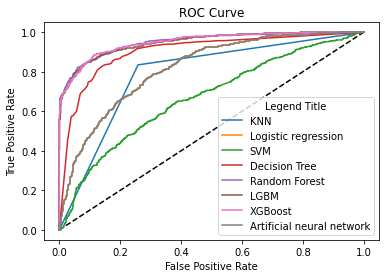

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_logreg, tpr_logreg, label='Logistic regression')
plt.plot(fpr_svc, tpr_svc, label='SVM')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_lgbmc, tpr_lgbmc, label='LGBM')
plt.plot(fpr_xgbc, tpr_xgbc, label='XGBoost')
plt.plot(fpr_logreg, tpr_logreg, label='Artificial neural network')

plt.legend(loc="lower right", title="Legend Title")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Confusion matrix

In [ ]:
classifiers = [logreg_cv_resampled,svc_cv_resampled,dt_cv_resampled,rf_random_grid_resampled,lgbmc_resampled,xgbc_resampled]
cls_names = ["K nearest neighbors", "Logistic regression","Support vector machine", "Decision Tree", "Random Forest", "LGBM", "XGBoost"]

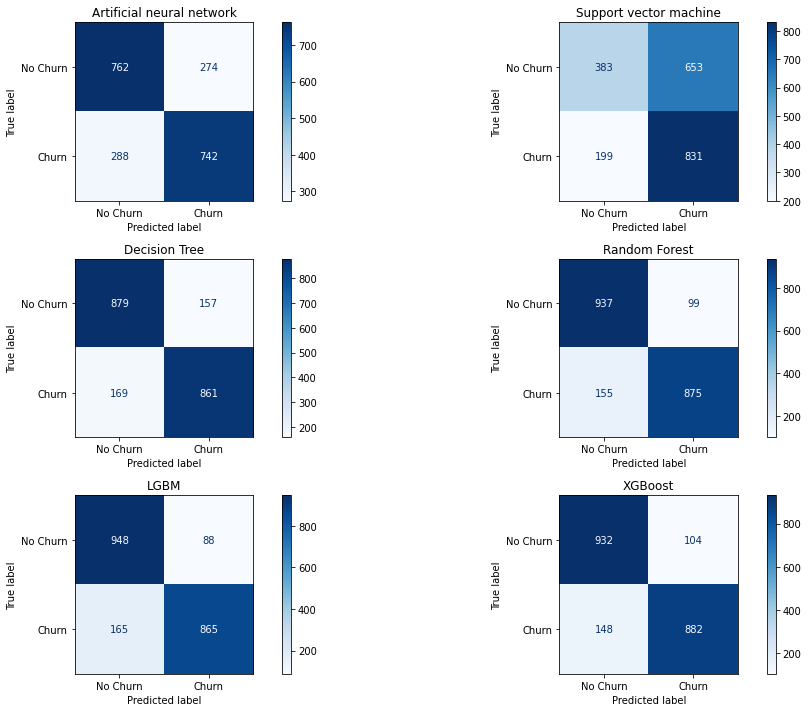

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for cls, ax,cls_name in zip(classifiers, axes.flatten(), cls_names):
    plot_confusion_matrix(cls, 
                          X_test_resampled,y_test_resampled, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["No Churn", "Churn"],values_format="d")
    ax.title.set_text(cls_name)
plt.tight_layout()  
plt.show()

# Neural Network Using Keras

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(36,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2368      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
130/130 [==============================] - 1s 6ms/step - loss: 0.6101 - accuracy: 0.6327 - val_loss: 0.4356 - val_accuracy: 0.7870
Epoch 2/20
130/130 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8160 - val_loss: 0.3666 - val_accuracy: 0.8403
Epoch 3/20
130/130 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8549 - val_loss: 0.3151 - val_accuracy: 0.8683
Epoch 4/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8816 - val_loss: 0.2746 - val_accuracy: 0.8935
Epoch 5/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9024 - val_loss: 0.2458 - val_accuracy: 0.9046
Epoch 6/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9208 - val_loss: 0.2367 - val_accuracy: 0.9056
Epoch 7/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9183 - val_loss: 0.2141 - val_accuracy: 0.9119
Epoch 